In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import LabelEncoder, normalize
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree

bc = load_breast_cancer()

X = bc.data
y = bc.target

bestFeatures = SelectKBest(score_func=chi2, k=5)
fit = bestFeatures.fit(X,y)
bcScores = pd.DataFrame(fit.scores_)
bcColumns = pd.DataFrame(bc.feature_names)

fScores = pd.concat([bcColumns, bcScores], axis=1)
fScores.columns=['Spec', 'Score']
print(fScores.nlargest(5, 'Score' ))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)

y_pred = RFC.predict(X_test)

print("AccSco: ", accuracy_score(y_test, y_pred), "\nConMat: ", confusion_matrix(y_test, y_pred), "\nClaRep: ", classification_report(y_test, y_pred))

               Spec          Score
23       worst area  112598.431564
3         mean area   53991.655924
13       area error    8758.504705
22  worst perimeter    3665.035416
2    mean perimeter    2011.102864
AccSco:  0.9649122807017544 
ConMat:  [[38  1]
 [ 3 72]] 
ClaRep:                precision    recall  f1-score   support

           0       0.93      0.97      0.95        39
           1       0.99      0.96      0.97        75

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



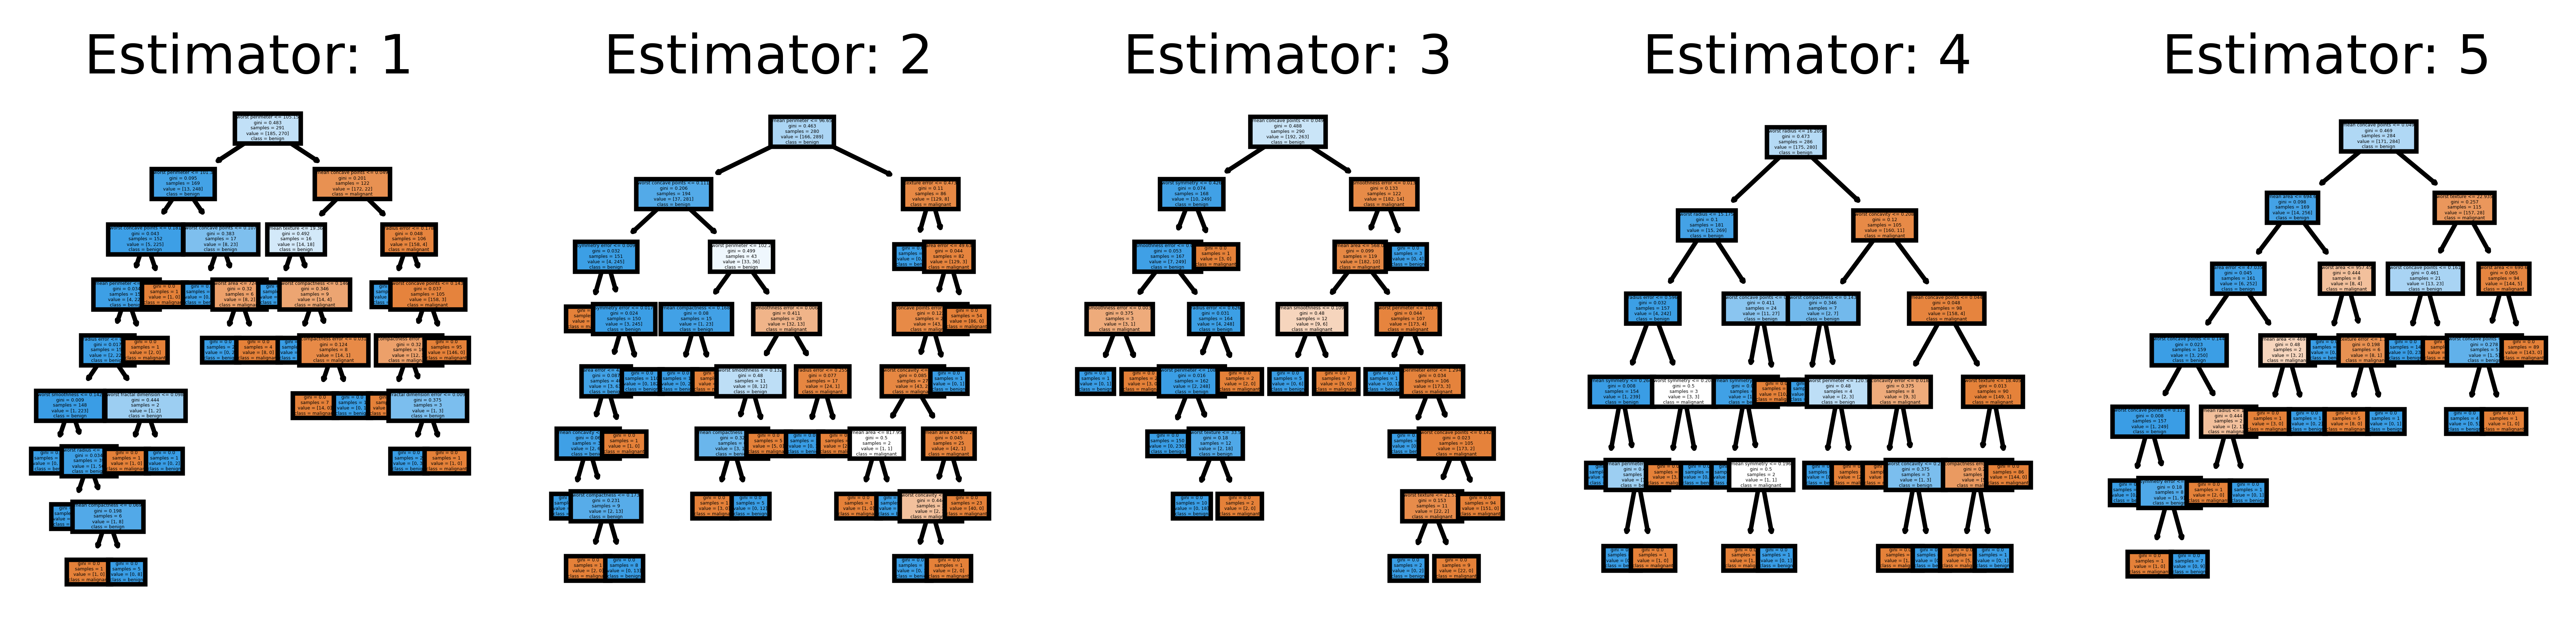

In [15]:
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    plot_tree(RFC.estimators_[index],
                   feature_names = bc.feature_names, 
                   class_names=bc.target_names,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index + 1), fontsize = 12)